In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('../data/preproc_kdd_train.csv')
df.sample(5)

,duration,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_tcp,protocol_udp,attack_type
10131,-0.221617,-0.594437,0.782064,0.200851,0.209710,-0.089486,-0.007736,-0.095076,-0.027023,0,...,1.00,0.00,0.02,0.89,0.01,0.01,0.0,0,1,normal
36911,-0.221617,0.190812,-0.813914,-1.082990,-0.869111,-0.089486,-0.007736,-0.095076,-0.027023,0,...,0.17,0.06,0.00,0.05,0.08,0.00,0.0,1,0,neptune
1799,-0.221617,-0.594437,0.782064,0.193481,0.347455,-0.089486,-0.007736,-0.095076,-0.027023,0,...,1.00,0.00,0.02,0.88,0.01,0.00,0.0,0,1,normal
19030,6.921644,0.190812,-2.104820,-0.850560,-0.869111,-0.089486,-0.007736,-0.095076,-0.027023,0,...,1.00,0.00,0.00,0.01,0.82,1.00,0.0,1,0,portsweep
45230,0.887290,-1.108681,0.782064,-0.430477,-0.415609,-0.089486,-0.007736,-0.095076,-0.027023,1,...,0.00,1.00,0.00,0.00,1.00,0.00,0.0,1,0,satan


In [28]:
X = df.drop(columns=['attack_type'], inplace=False)
distorsions = []
for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, random_state=24)
  kmeans.fit(X)
  distorsions.append(kmeans.inertia_)

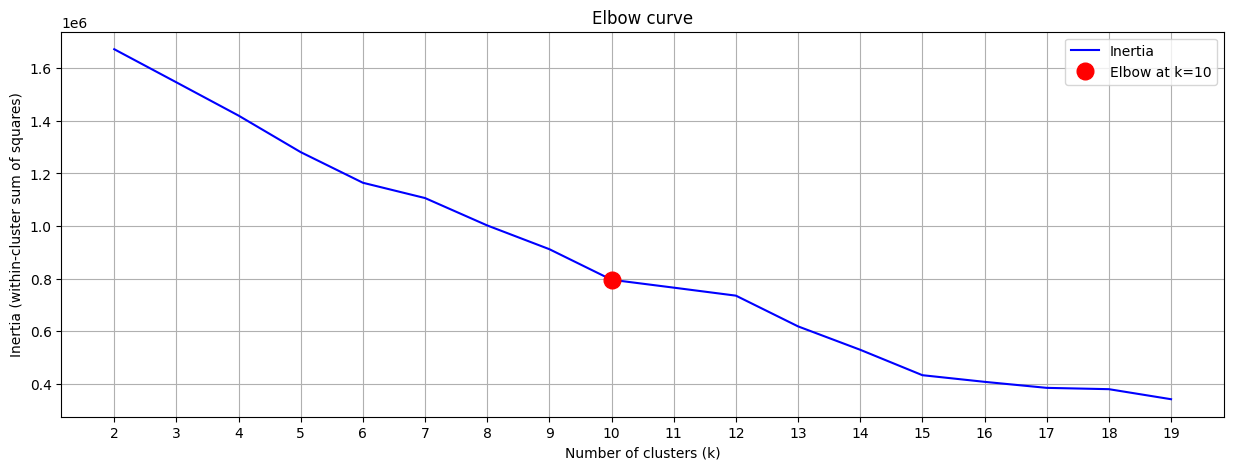

In [29]:
# Method 1: Elbow method using the "kneedle" algorithm (distance from line)
# Find the point with maximum distance from the line connecting first and last points
def find_elbow(values):
    # Normalize the values
    n_points = len(values)
    all_coords = np.vstack((range(n_points), values)).T
    first_point = all_coords[0]
    last_point = all_coords[-1]
    
    # Vector from first to last point
    line_vec = last_point - first_point
    line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))
    
    # Vector from first point to each point
    vec_from_first = all_coords - first_point
    
    # Distance from each point to the line
    scalar_product = np.sum(vec_from_first * line_vec_norm, axis=1)
    vec_to_line = vec_from_first - np.outer(scalar_product, line_vec_norm)
    dist_to_line = np.sqrt(np.sum(vec_to_line**2, axis=1))
    
    # Find the index with maximum distance
    elbow_idx = np.argmax(dist_to_line)
    return elbow_idx

elbow_idx = find_elbow(distorsions)
optimal_k = elbow_idx + 2  # +2 because we started at k=2

# Plotting
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, 'b-', label='Inertia')
plt.plot(optimal_k, distorsions[elbow_idx], 'ro', markersize=12, label=f'Elbow at k={optimal_k}')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.xticks(range(2, 20))
plt.legend()
plt.show()

In [30]:
# perform k-means clustering on dataset
k = 10
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X=X)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [31]:
X.columns

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'count', 'srv_count', 'srv_serror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'protocol_tcp', 'protocol_udp'],
      dtype='object')

In [32]:
# Get cluster labels for each point
df['cluster'] = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

print("Cluster labels:")
print(df)
print("Cluster centers:")
print(centers)

Cluster labels:
        duration   service      flag  src_bytes  dst_bytes  wrong_fragment  \
0      -0.221617 -0.728254  0.782064   0.995517  -0.869111       -0.089486   
1      -0.221617 -0.881565  0.782064   0.590429  -0.869111       -0.089486   
2      -0.221617  0.190812 -0.813914  -1.082990  -0.869111       -0.089486   
3      -0.221617  1.323938  0.782064   0.744881   1.668642       -0.089486   
4      -0.221617  1.323938  0.782064   0.693670   0.833560       -0.089486   
...          ...       ...       ...        ...        ...             ...   
125968 -0.221617  0.190812 -0.813914  -1.082990  -0.869111       -0.089486   
125969  1.292276  0.190812  0.782064   0.480779   0.535152       -0.089486   
125970 -0.221617 -0.700486  0.782064   1.502588   0.808373       -0.089486   
125971 -0.221617 -1.122228 -0.813914  -1.082990  -0.869111       -0.089486   
125972 -0.221617 -0.728254  0.782064   0.601645  -0.869111       -0.089486   

          urgent       hot  num_failed_logins  

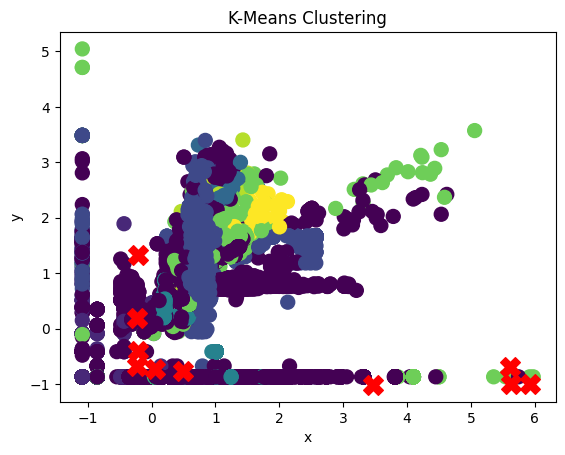

In [33]:
plt.scatter(df['src_bytes'], df['dst_bytes'], c=df['cluster'], cmap='viridis', s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)  # cluster centers
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Means Clustering')
plt.show()